# Exploring the simulation results

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

## Load and prepare the data

In [2]:
# df_nan = pd.read_hdf('results/run_grid_5_nan.hdf')
# df_notnan = pd.read_hdf('results/run_grid_5_notnan.hdf')
# df = pd.concat([df_nan, df_notnan])

df = pd.read_hdf('results/run_grid_6.hdf')

# df = pd.read_hdf('results/run_new_parallel.hdf')
# df = pd.read_hdf('results/run_prec_exp.hdf')


df

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction
0,300,300,2,4,20.0,0.0,0.0,0.0,0.000000,100,5000,"[119.65165336092566, 119.65165336092566, 119.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,300,300,2,4,20.0,0.0,0.0,0.0,33.333333,100,5000,"[125.33208712078572, 125.33208712078572, 125.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,300,300,2,4,20.0,0.0,0.0,0.0,66.666667,100,5000,"[127.33630234158039, 127.33630234158039, 127.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,300,300,2,4,20.0,0.0,0.0,0.0,100.000000,100,5000,"[129.03027038495821, 129.03027038495821, 128.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,300,300,2,4,20.0,0.0,0.0,20.0,0.000000,100,5000,"[118.74236846399577, 118.74236846399577, 118.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,300,300,2,4,100.0,100.0,100.0,80.0,100.000000,100,5000,"[128.28305460502824, 128.28305460502824, 128.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2996,300,300,2,4,100.0,100.0,100.0,100.0,0.000000,100,5000,"[120.50974192369694, 120.50974192369694, 120.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2997,300,300,2,4,100.0,100.0,100.0,100.0,33.333333,100,5000,"[127.53778122502341, 127.53778122502341, 127.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2998,300,300,2,4,100.0,100.0,100.0,100.0,66.666667,100,5000,"[122.87450179499639, 122.87450179499639, 122.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [101]:
def moving_average(a, n=3):
    # Add zeros at the beginning, so the result doesn't change dimensions
    a = np.concatenate([([0] * (n - 1)), a])

    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def visualize_run(run, average_steps=500, extra_title=''):
    x = list(range(run['max_iter']))

    step_stats = run['goal_distance']
    parent_stats = run['parent_satisfaction']
    infant_stats = run['infant_satisfaction']

    parent_stats = moving_average(parent_stats, average_steps)
    infant_stats = moving_average(infant_stats, average_steps)

    fig, ax1 = plt.subplots(figsize=(8, 5))

    ax1.plot(x, step_stats, color='r')
    ax1.set_ylim(bottom=0, top=150)
    ax1.set_ylabel('toy distance')
    ax1.set_xlabel('step')

    title = f'\
lego={run["lego_count"]}, prec={run["precision"]:.1f}, exp={run["exploration"]:.1f},\
coord={run["coordination"]:.1f}, resp={run["responsiveness"]:.1f}, rel={run["relevance"]:.1f},\
avg for {run["repeats"]} runs\
    '

    if extra_title != '':
        title = extra_title + '\n' + title

    ax1.set_title(title)
    ax1.legend(['toy distance'], loc='lower right')

    ax2 = ax1.twinx()
    ax2.plot(x, parent_stats, color='b')
    ax2.set_ylabel('TPS')

    ax2.plot(x, infant_stats, color='orange')
    ax2.set_ylim(bottom=0)

    ax2.axvline(x=average_steps - 1, color='grey', label='axvline - full height')
    ax2.legend(['parent TPS', 'infant TPS'], loc='upper right')

    x_ticks = np.append(ax1.get_xticks()[1:-1], average_steps)
    ax1.set_xticks(x_ticks)
    ax2.set_xticks(x_ticks)

    fig.tight_layout()
    # plt.savefig(f'../../plots/big_{current_param}.png', dpi=300)
    plt.show()

### Show a couple of randomly selected runs and see how they performed

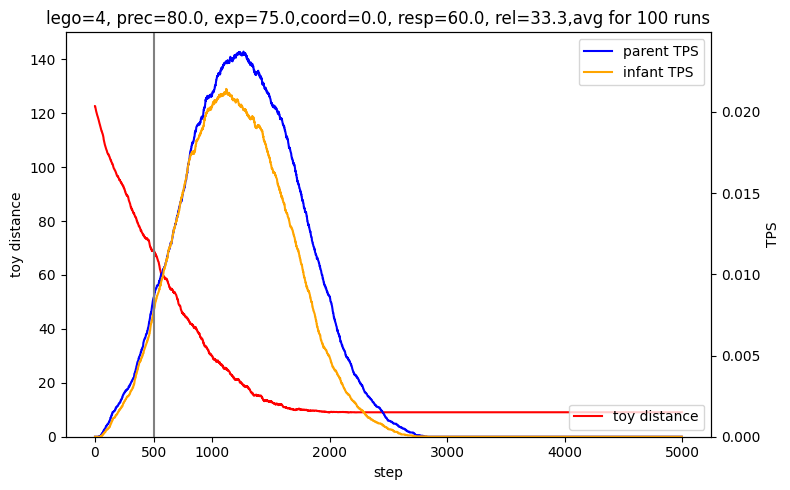

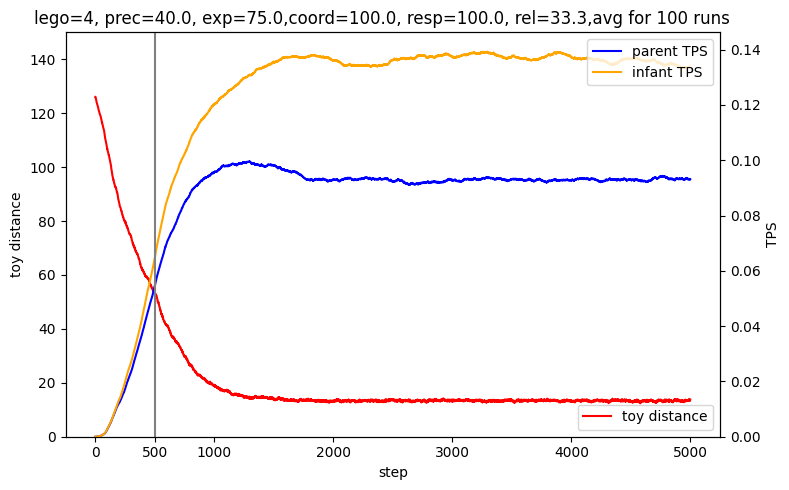

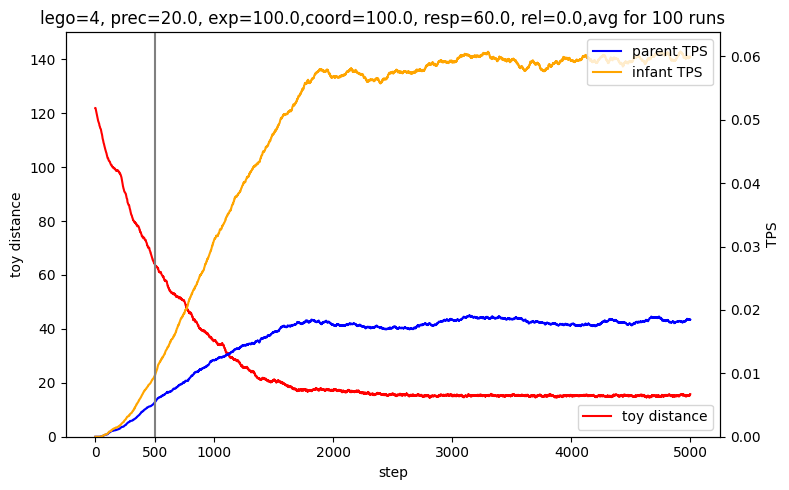

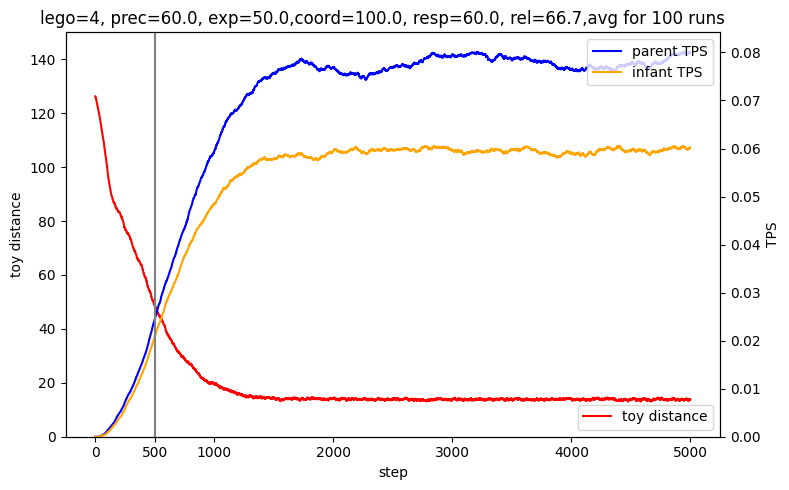

In [103]:
average_steps = 500

random_runs = np.random.choice(range(len(df)), size=4, replace=False)
for r in random_runs:
    visualize_run(df.loc[r, :], average_steps=average_steps)

## 1 - using steps required to reach emergent action as a metric

### Add new column, which determines if the run was successful and if so - in how many steps the goal has been achieved

In [35]:
def get_success_step(dists, success_dist):
    try:
        return np.where(dists < success_dist)[0][0]
    except IndexError:
        return np.NaN

success_dist = 40

df['success_steps'] = df.apply(lambda row: get_success_step(row['goal_distance'], 40), axis=1)
df.sort_values(by=['success_steps']).head()

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
2396,300,300,2,4,80.0,100.0,100.0,100.0,0.0,100,5000,"[119.76569558913037, 119.76569558913037, 119.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",370.0
2036,300,300,2,4,80.0,25.0,100.0,100.0,0.0,100,5000,"[123.65016002089239, 123.65016002089239, 123.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",371.0
2156,300,300,2,4,80.0,50.0,100.0,100.0,0.0,100,5000,"[120.46625407634774, 120.46625407634774, 120.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",385.0
2276,300,300,2,4,80.0,75.0,100.0,100.0,0.0,100,5000,"[127.66748688802973, 127.66748688802973, 127.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",390.0
2032,300,300,2,4,80.0,25.0,100.0,80.0,0.0,100,5000,"[131.62478331376113, 131.62478331376113, 131.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",423.0


In [114]:
# df[df['success_steps'].isna() ].to_hdf('results/run_grid_5_nan.hdf', 'hdfkey')
# df[df['success_steps'].notna() ].to_hdf('results/run_grid_5_notnan.hdf', 'hdfkey')

/tmp/ipykernel_106633/893070050.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['goal_distance', 'parent_satisfaction', 'infant_satisfaction'], dtype='object')]

  df[df['success_steps'].isna() ].to_hdf('results/run_grid_5_nan.hdf', 'hdfkey')
/tmp/ipykernel_106633/893070050.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['goal_distance', 'parent_satisfaction', 'infant_satisfaction'], dtype='object')]

  df[df['success_steps'].notna() ].to_hdf('results/run_grid_5_notnan.hdf', 'hdfkey')


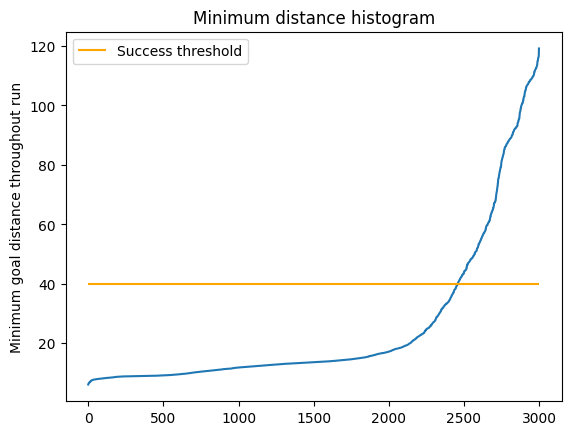

In [4]:
y = df.apply(lambda row: np.min(row['goal_distance']), axis=1).sort_values().to_numpy()

fig, ax = plt.subplots()
ax.plot(y)
ax.set_title('Minimum distance histogram')
ax.set_ylabel('Minimum goal distance throughout run')
ax.hlines(y=success_dist, xmin=0, xmax=len(y), color='orange', label='Success threshold')
ax.legend()
plt.show()

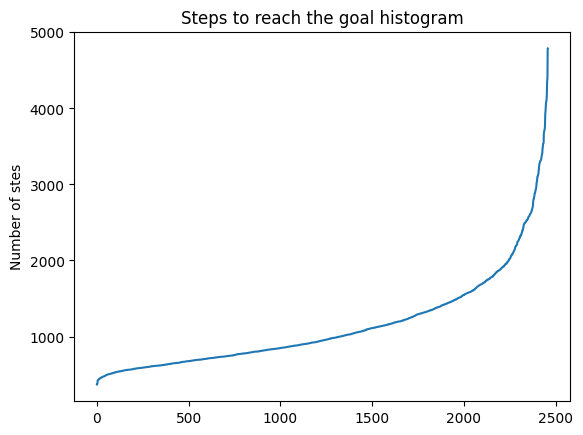

In [5]:
y = df[df['success_steps'].notna()].apply(lambda row: np.min(row['success_steps']), axis=1).sort_values().to_numpy()

fig, ax = plt.subplots()
ax.plot(y)
ax.set_title('Steps to reach the goal histogram')
ax.set_ylabel('Number of stes')
plt.show()

### See how the best run performed, for different number of steps used in calculating the moving average

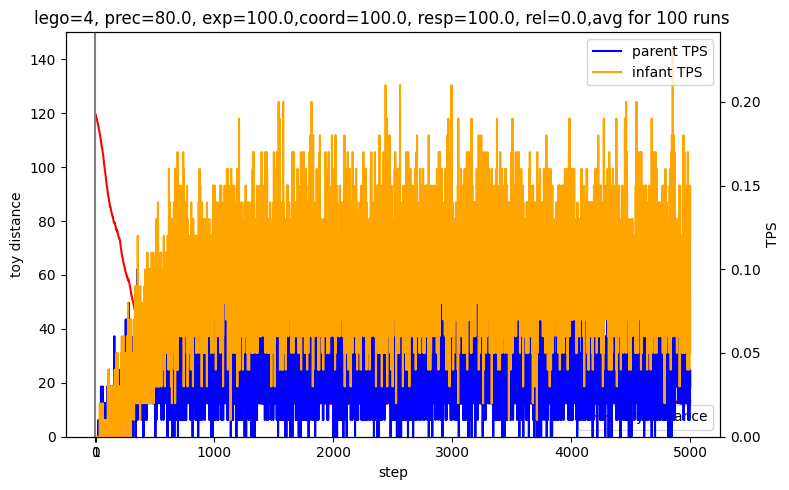

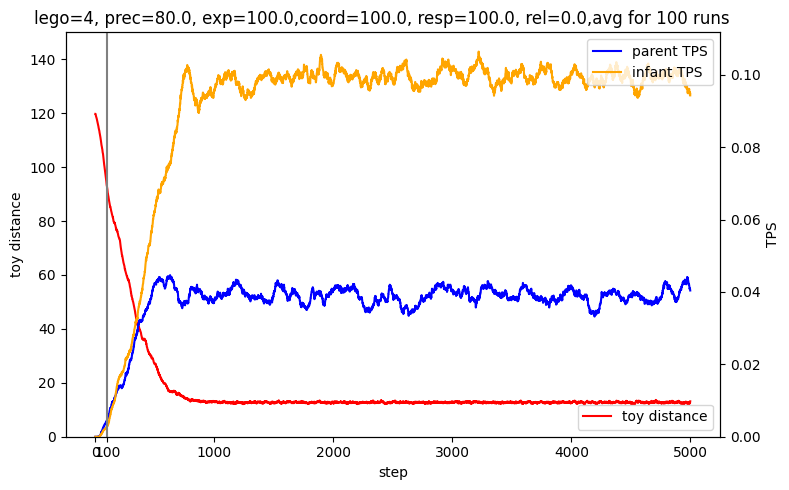

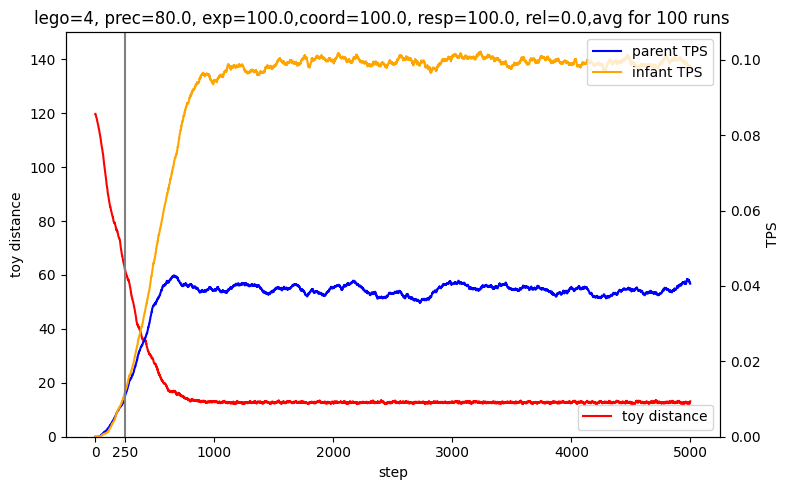

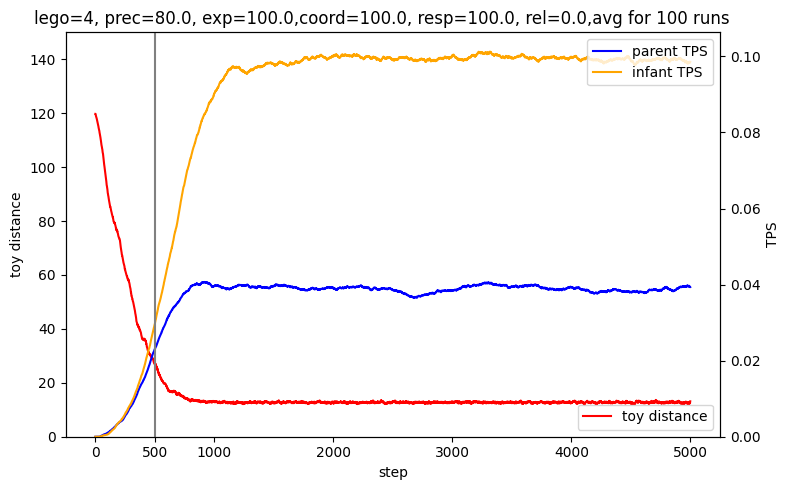

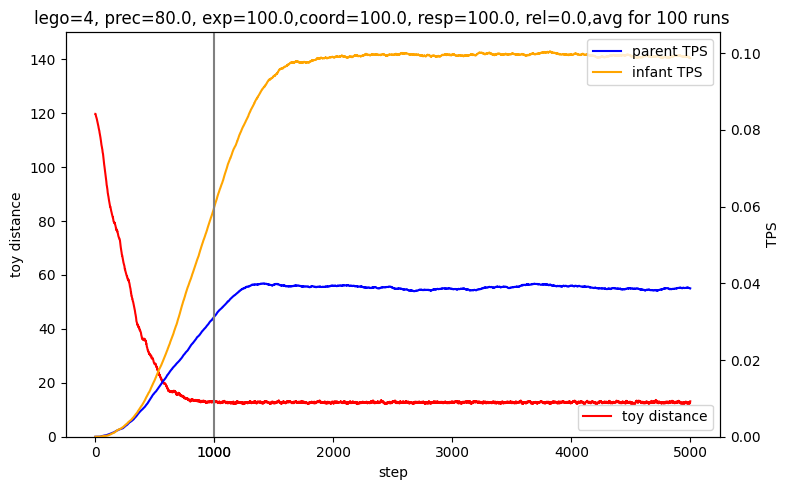

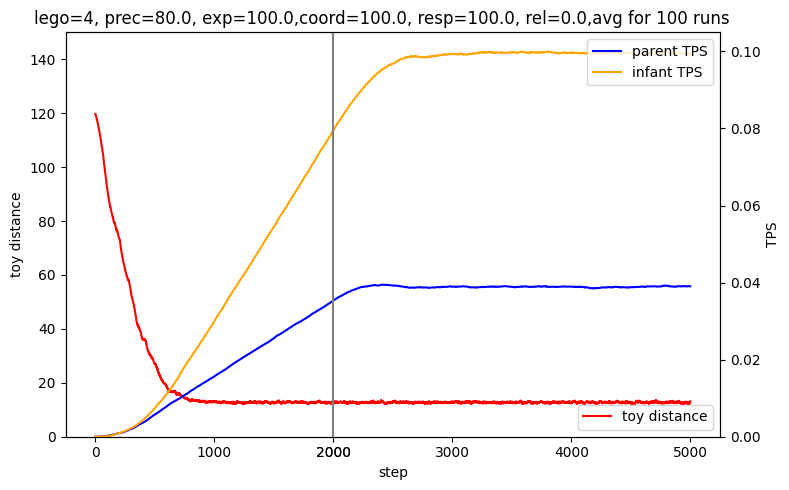

In [91]:
for steps in [1, 100, 250, 500, 1000, 2000]:
    visualize_run(df.sort_values(by=['success_steps']).iloc[0, :], average_steps=steps)

### Create heatmap for 2 variables
Find 3 paramters which change the least in the top runs and free the remaining two

In [245]:
def get_heatmap_data_fixed(df, metric, top_runs_no):
    top_runs = df.sort_values(by=['success_steps']).head(top_runs_no)

    params_data = []

    for param in ['precision', 'exploration', 'relevance', 'responsiveness', 'coordination']:
        bincount = np.bincount(top_runs[param])
        count = np.max(bincount)
        value = np.argmax(bincount)

        params_data.append([param, value, count])

    params_df = pd.DataFrame(params_data, columns=['param', 'best_value', 'count']).sort_values('count', ascending=False)
    print(params_df)
    fixed_params = params_df.head(3).loc[:, ['param', 'best_value']].to_numpy().reshape(6)
    free_params = params_df.tail(2).loc[:, ['param', 'best_value']].to_numpy().reshape(4)

    p1, v1, p2, v2, p3, v3 = fixed_params
    param1, val1, param2, val2 = free_params

    selected_runs = df[ (df[p1] == v1) & (df[p2] == v2) & (df[p3] == v3)]
    selected_runs = selected_runs.sort_values(by=[param1, param2])

    labels1 = selected_runs[param1].unique().round()
    labels2 = selected_runs[param2].unique().round()

    hm_data = selected_runs[metric].to_numpy().reshape(len(labels1), len(labels2)).T

    return hm_data, fixed_params, [param1, param2], [labels1, labels2]

In [259]:
def get_heatmap_data_average(df, metric, top_runs_no):
    top_runs = df.sort_values(by=['success_steps']).head(top_runs_no)

    params_data = []

    for param in ['precision', 'exploration', 'relevance', 'responsiveness', 'coordination']:
        bincount = np.bincount(top_runs[param])
        count = np.max(bincount)
        value = np.argmax(bincount)

        params_data.append([param, value, count])

    params_df = pd.DataFrame(params_data, columns=['param', 'best_value', 'count']).sort_values('count', ascending=False)
    print(params_df)
    free_params = params_df.head(2).loc[:, 'param'].to_numpy().reshape(2).tolist()
    fixed_params = params_df.tail(3).loc[:, 'param'].to_numpy().reshape(3).tolist()
    
    avg_df = df.groupby(free_params).mean(numeric_only=True)
    # display(avg_df)

    param1, param2 = free_params
    selected_runs = avg_df.sort_values(by=[param1, param2])

    labels1 = df[param1].unique().round()
    labels2 = df[param2].unique().round()

    hm_data = avg_df[metric].to_numpy().reshape(len(labels1), len(labels2)).T

    return hm_data, [param1, param2], [labels1, labels2]

In [261]:
def create_heatmap(heatmap_data, labelsx, labelsy, invert_colors=False, title=""):
    assert(heatmap_data.shape == (len(labelsy), len(labelsx)))

    colormap_data = np.nan_to_num(heatmap_data, nan=(np.nanmax(heatmap_data) + 100))

    fig, ax = plt.subplots(figsize=(10, 10))

    if invert_colors:
        cmap = matplotlib.colormaps['viridis_r']
    else:
        cmap = matplotlib.colormaps['viridis']
    im = ax.imshow(colormap_data, cmap=cmap)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(labelsx)), labels=labelsx)
    ax.set_yticks(np.arange(len(labelsy)), labels=labelsy)

    ax.set_xlabel(param1)
    ax.set_ylabel(param2)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(labelsx)):
        for j in range(len(labelsy)):
            text = ax.text(i, j, heatmap_data[j, i], ha="center", va="center", color="w")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

            param  best_value  count
4    coordination         100     27
2       relevance           0     25
0       precision          80     19
3  responsiveness         100     16
1     exploration         100     11


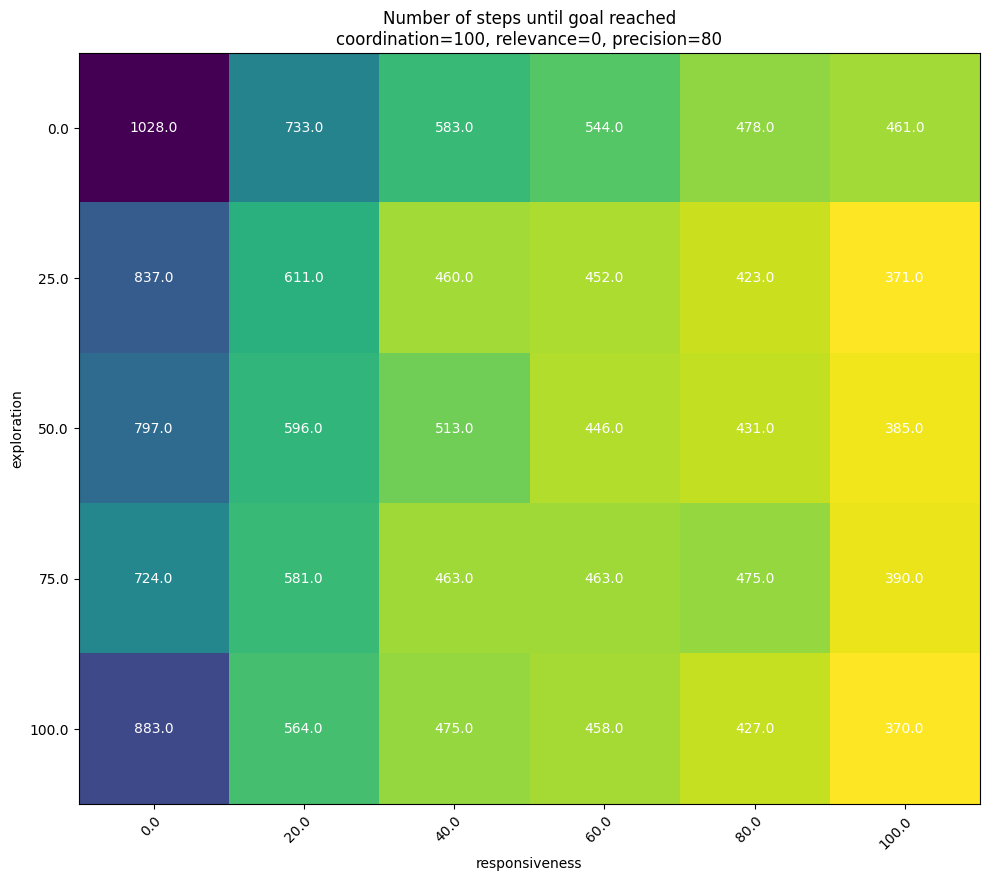

In [262]:
hm_data, [p1, v1, p2, v2, p3, v3], [param1, param2], [labels1, labels2] = get_heatmap_data_fixed(df, 'success_steps', top_runs_no=30)
title = f'Number of steps until goal reached\n{p1}={v1}, {p2}={v2}, {p3}={v3}'
create_heatmap(hm_data, labels1, labels2, invert_colors=True, title=title)

            param  best_value  count
4    coordination         100     27
2       relevance           0     25
0       precision          80     19
3  responsiveness         100     16
1     exploration         100     11


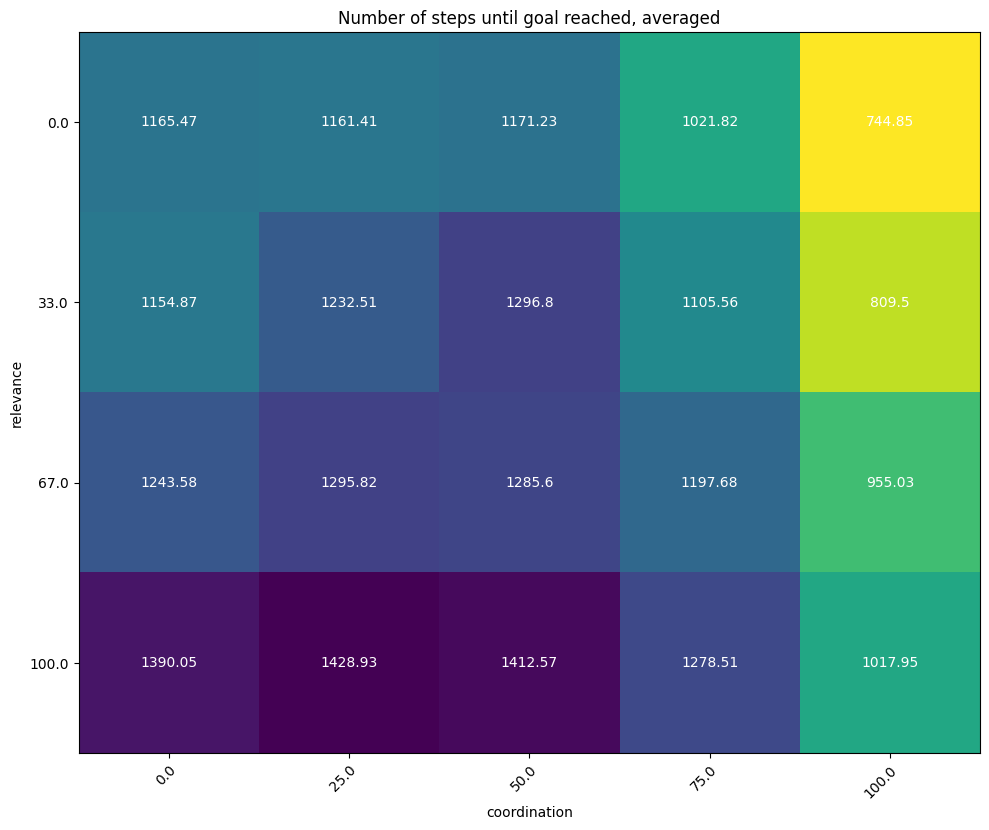

In [263]:
hm_data, [param1, param2], [labels1, labels2] = get_heatmap_data_average(df, 'success_steps', top_runs_no=30)

create_heatmap(hm_data.round(2), labels1, labels2, invert_colors=True, title='Number of steps until goal reached, averaged')

## Using TPS (third-party state) measure as a metric

Let's define two metrics - maximum TPS throughout the run, and TPS at the end of the run. 
Both values will be calculated using the moving average.
We will measure the TPS for parent and infant separately.

In [ ]:
average_steps = 500

In [ ]:
def moving_average(a, n=3):
    # Add zeros at the beginning, so the result doesn't change dimensions
    a = np.concatenate([([0] * (n - 1)), a])

    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [94]:
df_tps = df.copy()

df_tps['parent_tps_max'] = df.apply(lambda row: moving_average(row['parent_satisfaction'], n=average_steps).max(), axis=1)
df_tps['parent_tps_end'] = df.apply(lambda row: moving_average(row['parent_satisfaction'], n=average_steps)[-1], axis=1)
df_tps['infant_tps_max'] = df.apply(lambda row: moving_average(row['infant_satisfaction'], n=average_steps).max(), axis=1)
df_tps['infant_tps_end'] = df.apply(lambda row: moving_average(row['infant_satisfaction'], n=average_steps)[-1], axis=1)

In [166]:
new_df = df_tps.groupby(['coordination', 'precision']).mean(numeric_only=True)
new_df

width  height  speed  lego_count  exploration  \
coordination precision                                                  
0.0          20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
25.0         20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
50.0         20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
75.0         20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
100.0        20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   

                        responsiveness  relevance  repeats  max_iter  \
coordination precision                                                 
0.0          20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
25.0         20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
50.0         20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
75.0         20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
100.0        20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   

                        success_steps  parent_tps_max  parent_tps_end  \
coordination precision            

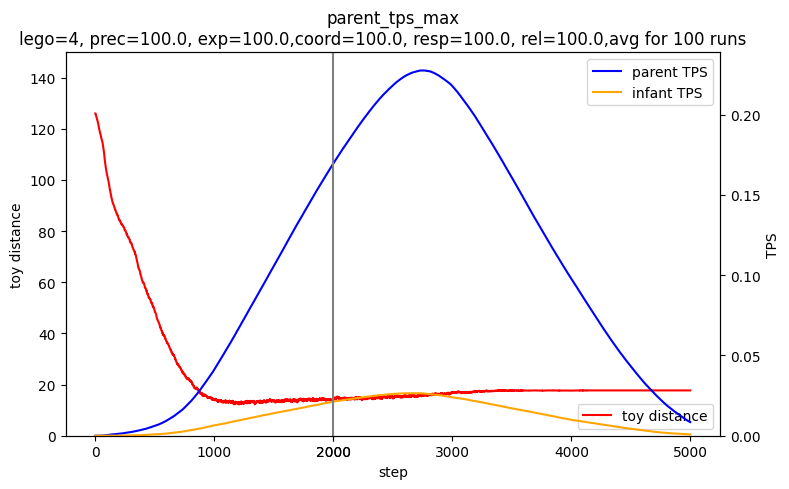

            param  best_value  count
4    coordination         100     27
2       relevance           0     25
0       precision          80     19
3  responsiveness         100     16
1     exploration         100     11


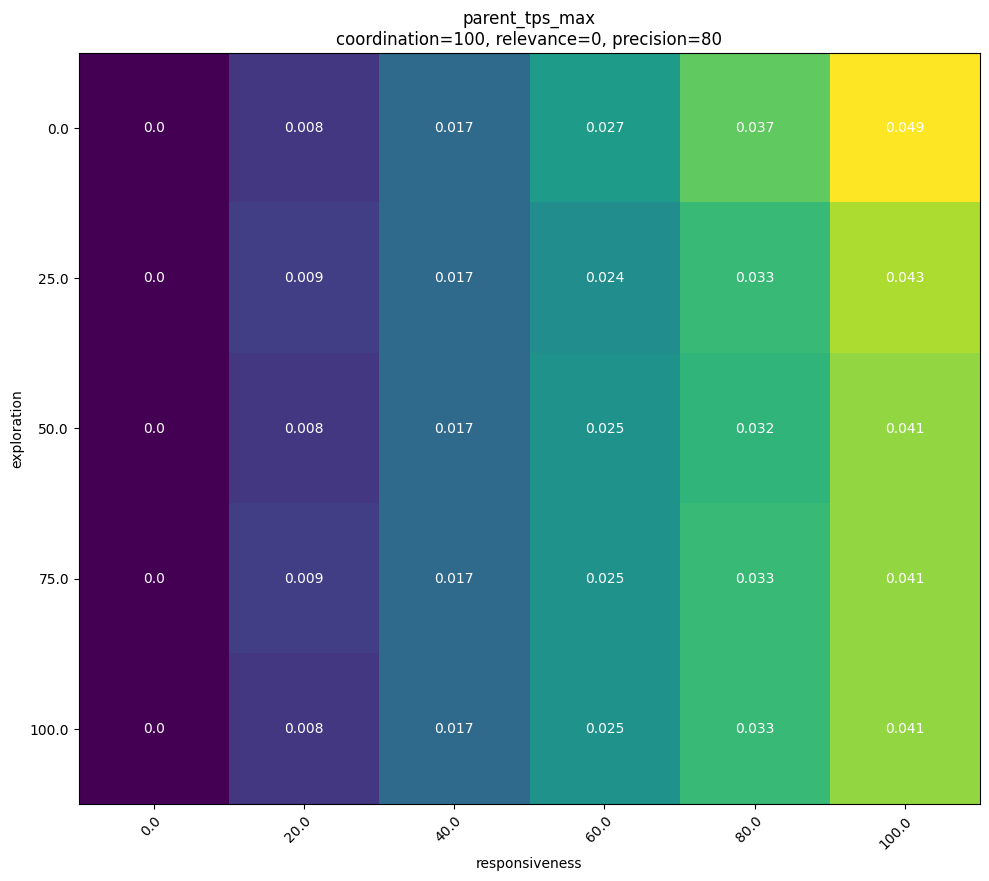

            param  best_value  count
4    coordination         100     27
2       relevance           0     25
0       precision          80     19
3  responsiveness         100     16
1     exploration         100     11


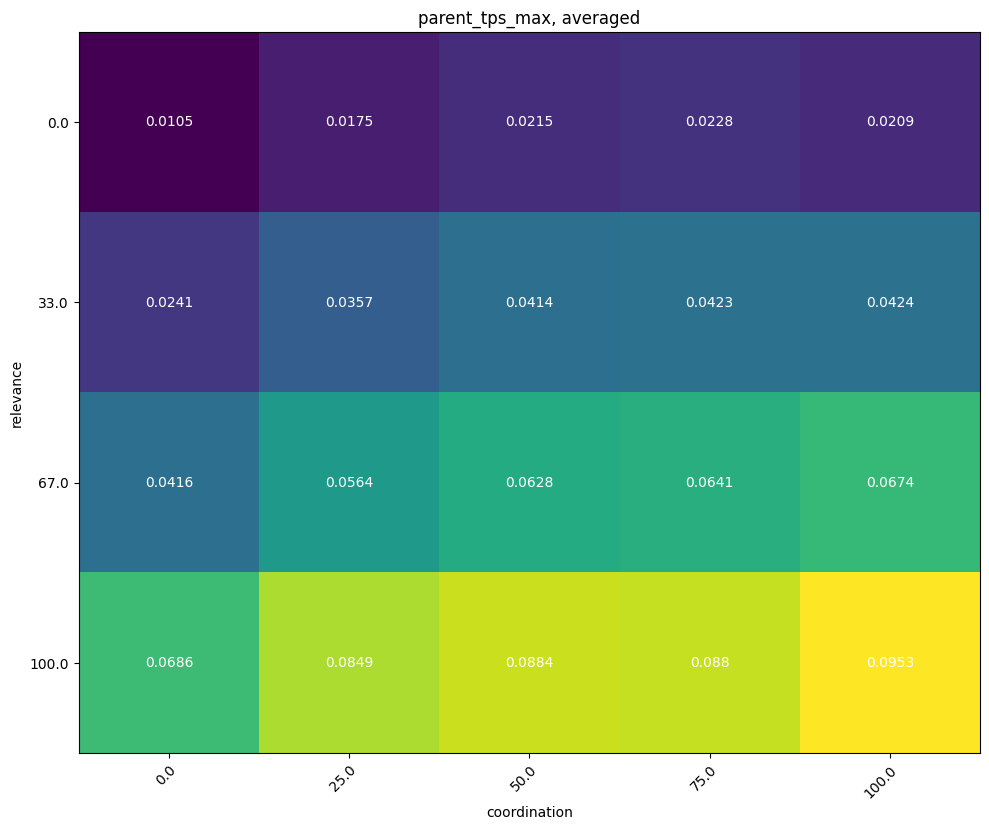

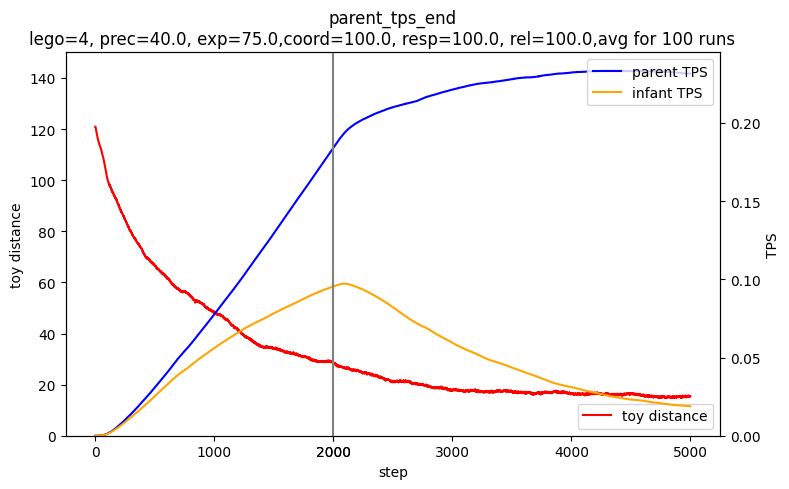

            param  best_value  count
4    coordination         100     27
2       relevance           0     25
0       precision          80     19
3  responsiveness         100     16
1     exploration         100     11


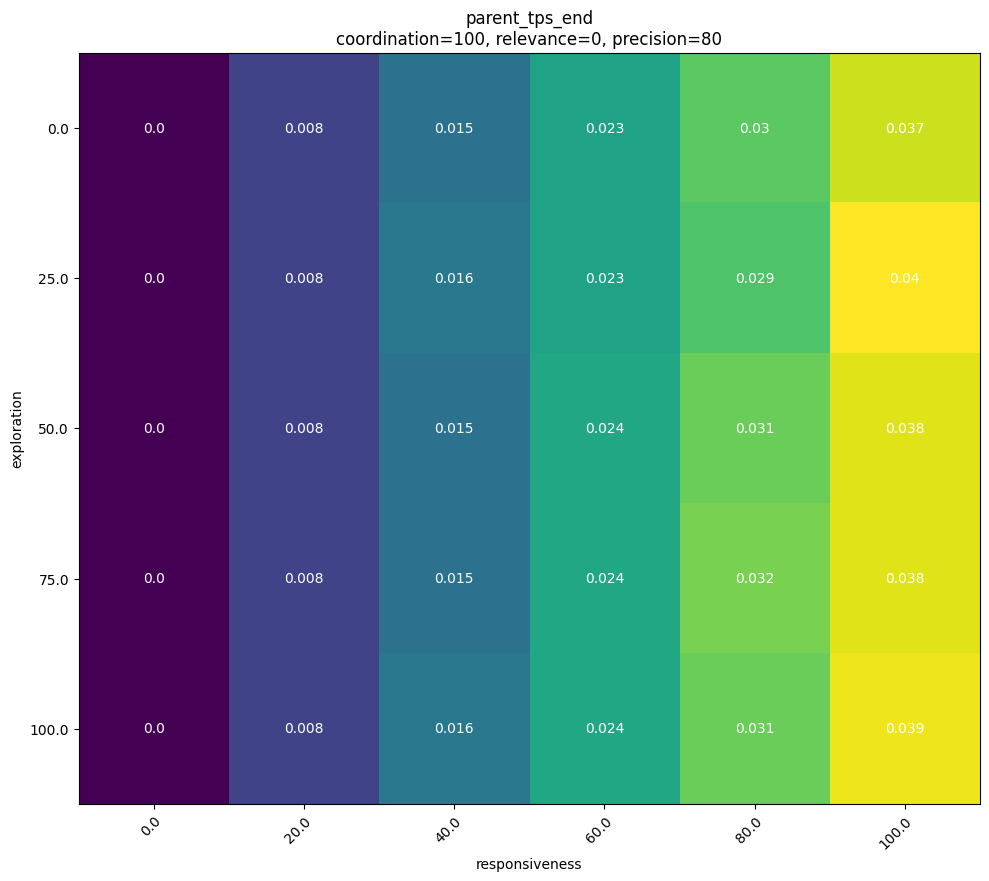

            param  best_value  count
4    coordination         100     27
2       relevance           0     25
0       precision          80     19
3  responsiveness         100     16
1     exploration         100     11


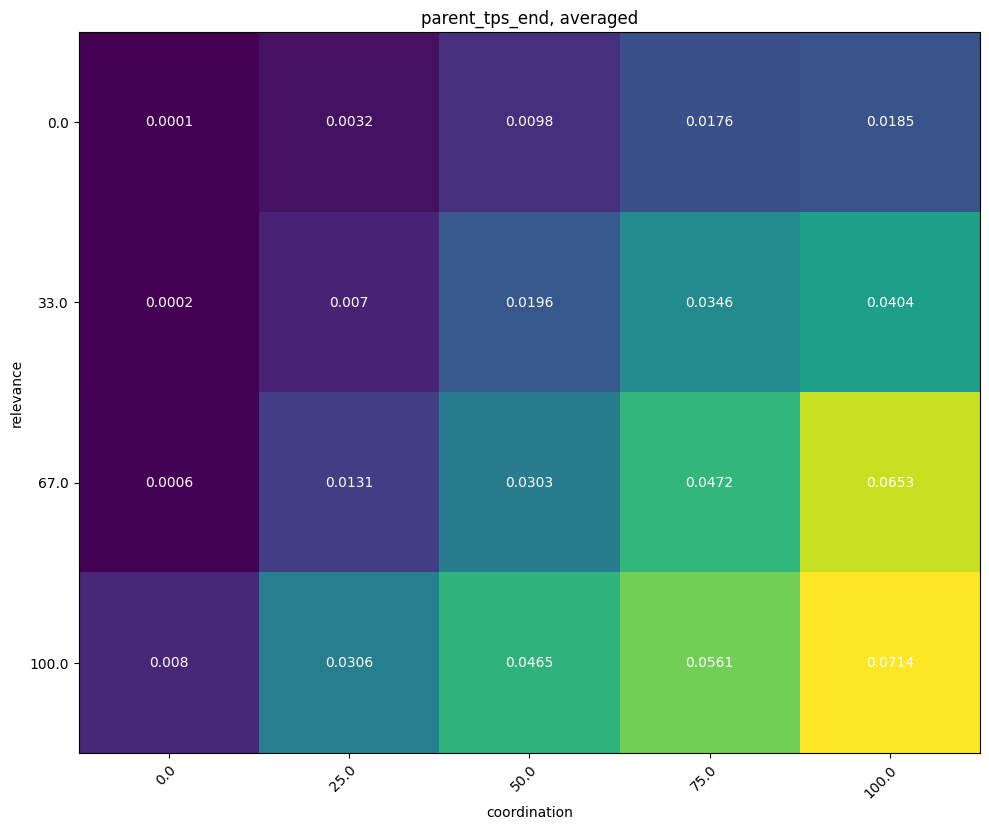

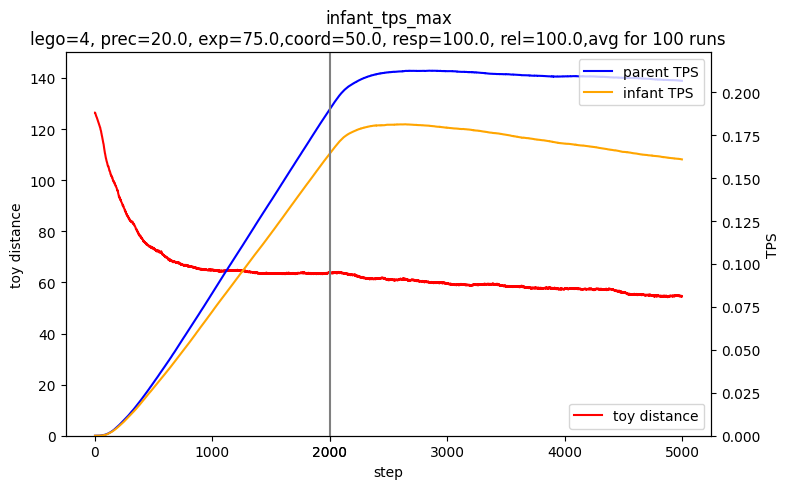

            param  best_value  count
4    coordination         100     27
2       relevance           0     25
0       precision          80     19
3  responsiveness         100     16
1     exploration         100     11


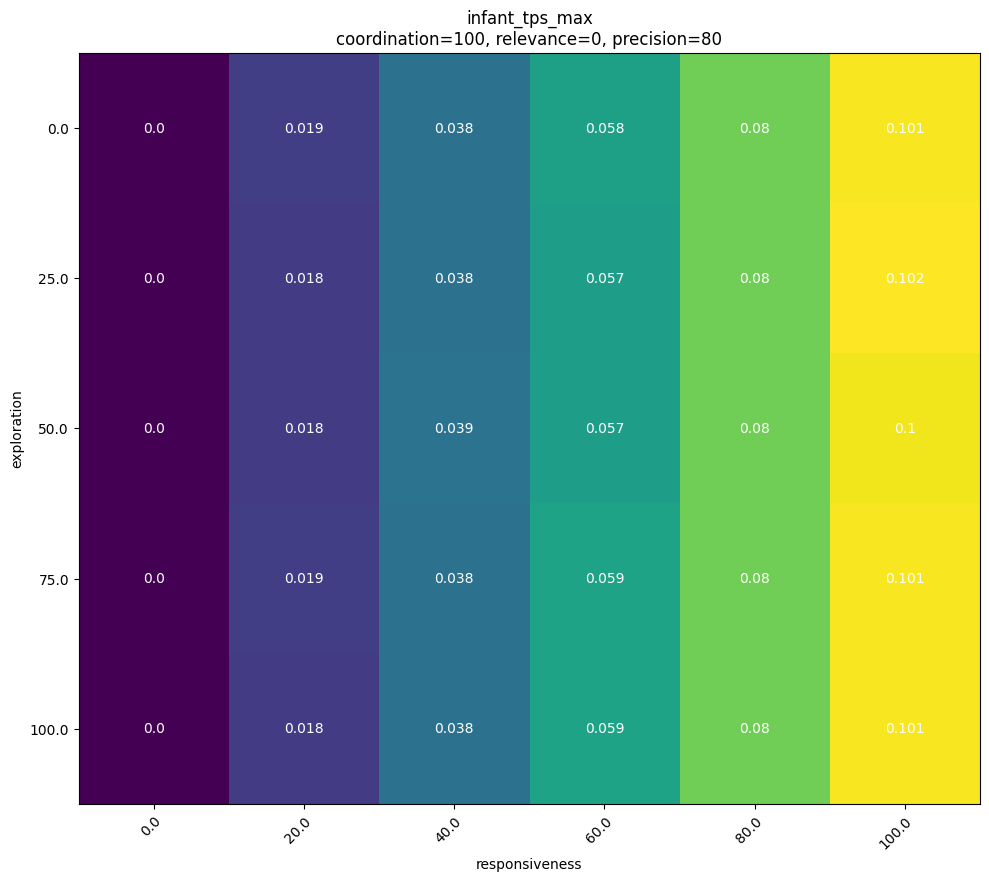

            param  best_value  count
4    coordination         100     27
2       relevance           0     25
0       precision          80     19
3  responsiveness         100     16
1     exploration         100     11


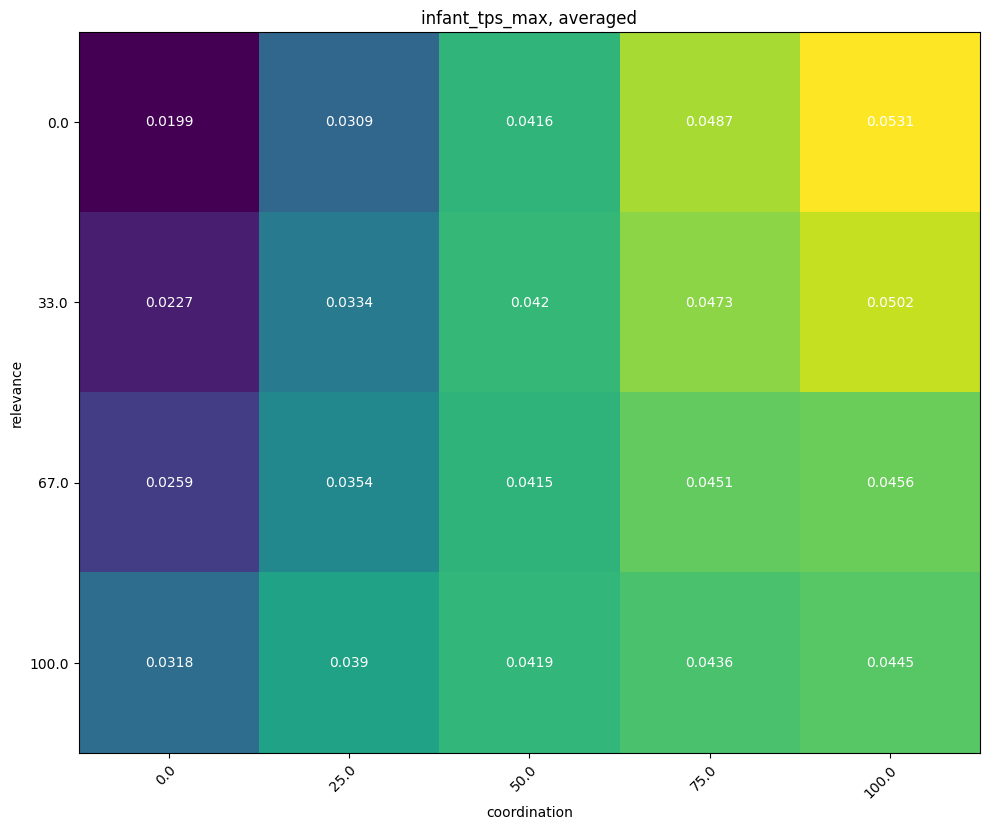

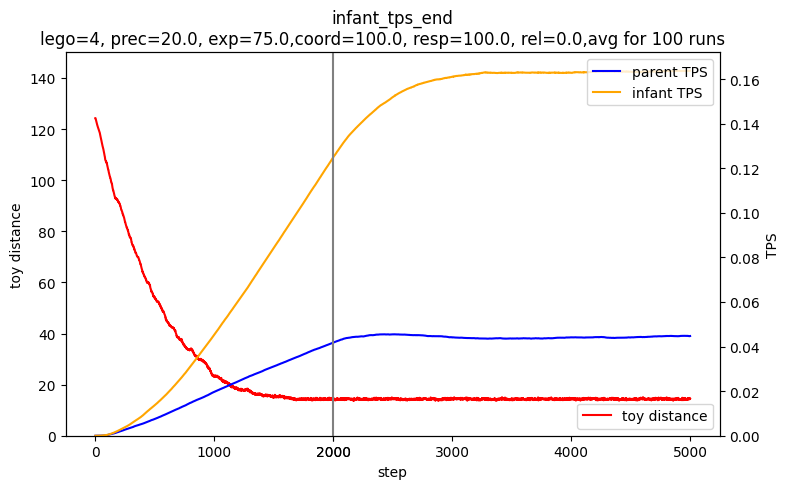

            param  best_value  count
4    coordination         100     27
2       relevance           0     25
0       precision          80     19
3  responsiveness         100     16
1     exploration         100     11


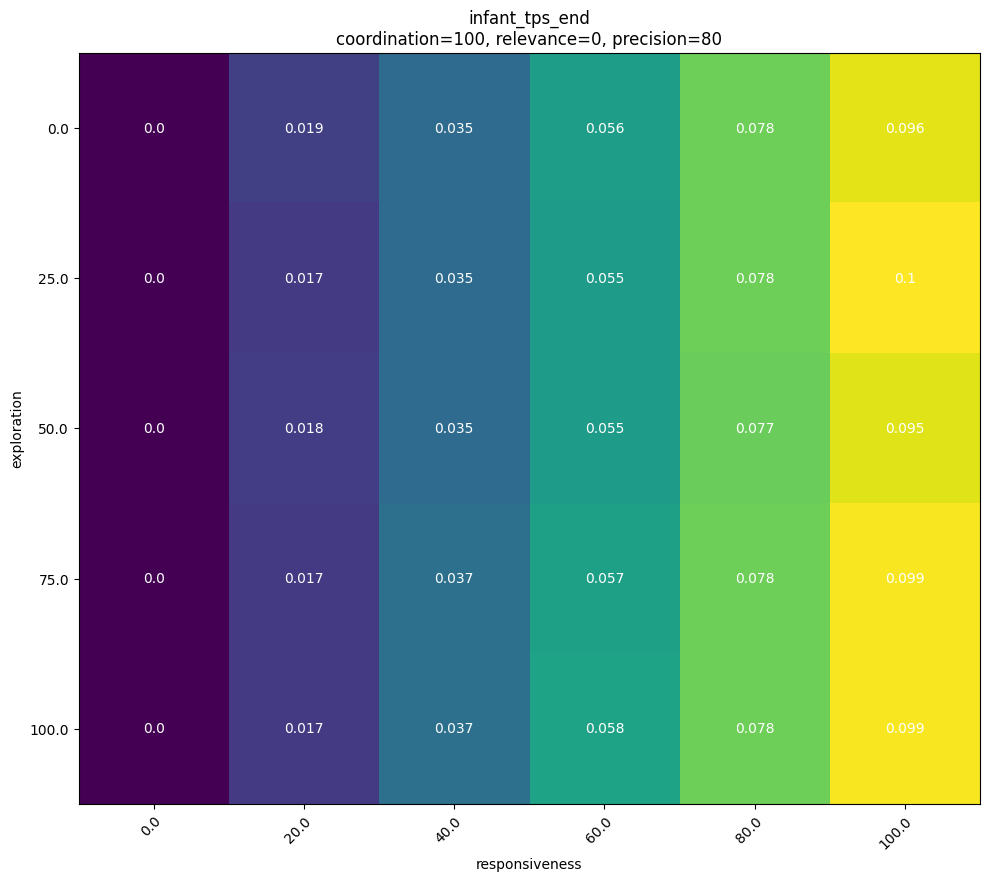

            param  best_value  count
4    coordination         100     27
2       relevance           0     25
0       precision          80     19
3  responsiveness         100     16
1     exploration         100     11


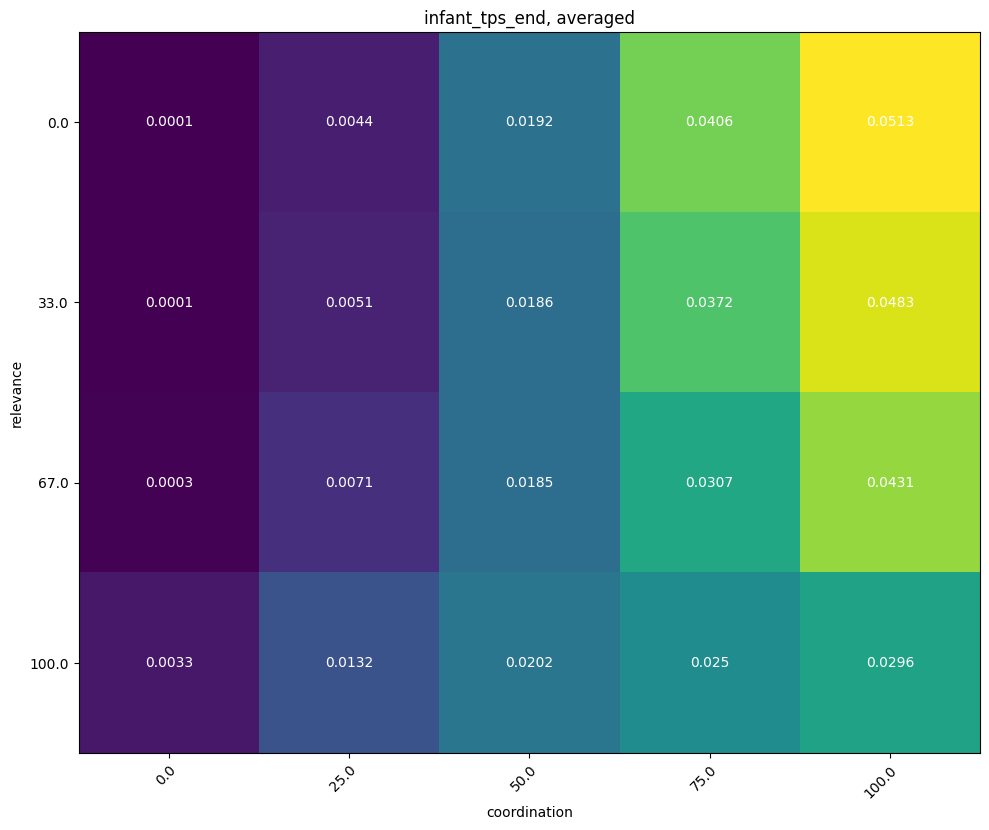

In [264]:
for agent in ['parent', 'infant']:
    for kind in ['max', 'end']:
        metric = agent + '_tps_' + kind
        visualize_run(df_tps.sort_values(by=[metric], ascending=False).iloc[0, :], average_steps=steps, extra_title=metric)

        hm_data, [p1, v1, p2, v2, p3, v3], [param1, param2], [labels1, labels2] = get_heatmap_data_fixed(df_tps, metric, top_runs_no=30)
        title = f'{metric}\n{p1}={v1}, {p2}={v2}, {p3}={v3}'
        create_heatmap(hm_data.round(3), labels1, labels2, title=title)

        hm_data, [param1, param2], [labels1, labels2] = get_heatmap_data_average(df_tps, metric, top_runs_no=30)
        # print(hm_data)
        create_heatmap(hm_data.round(4), labels1, labels2, title=f'{metric}, averaged')